# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster   import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# 1.1 Read the CSV
df = pd.read_csv('Wholesale_Data.csv')

# 1.2 Quick peek
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [55]:
# Check for missing values
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
kmeans_cluster      0
hier_cluster        0
PC1                 0
PC2                 0
dtype: int64

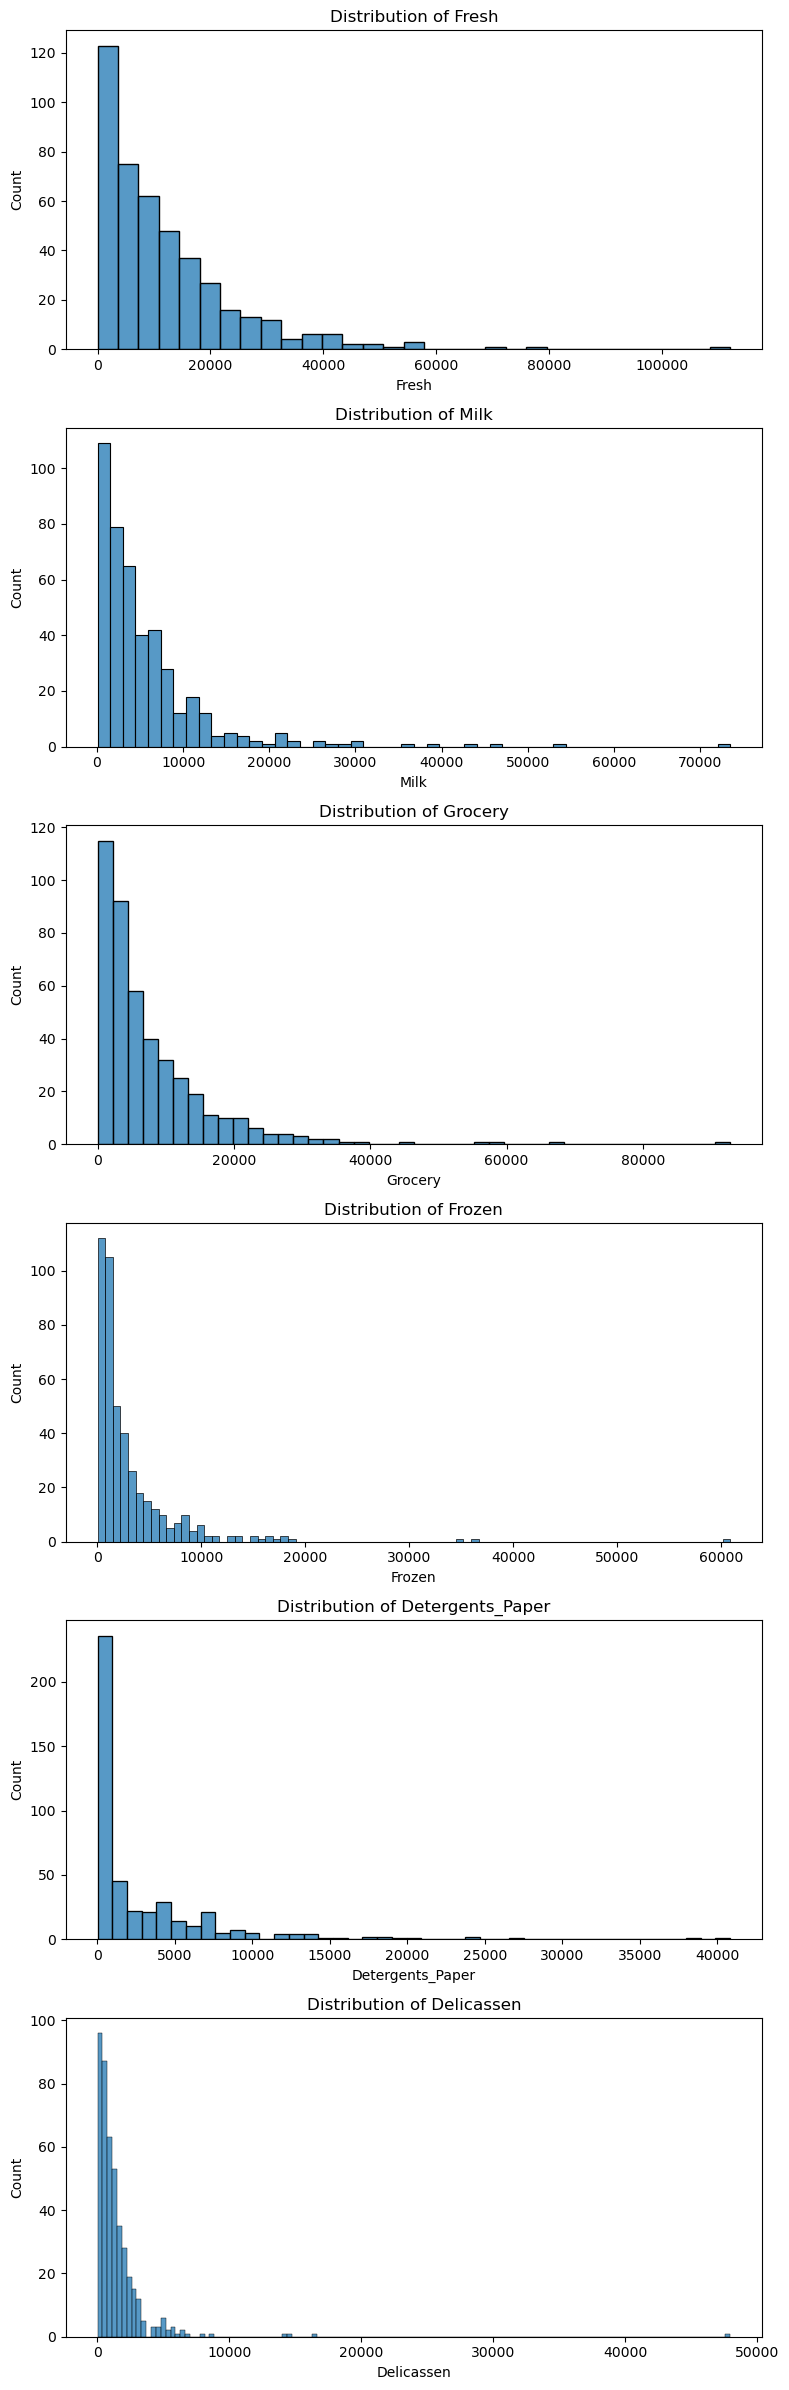

In [71]:
# Pick only the spend-columns
spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

# Make one histogram per feature
fig, axes = plt.subplots(len(spend_cols), 1, figsize=(8, 4*len(spend_cols)))
for ax, col in zip(axes, spend_cols):
    sns.histplot(df[col], ax=ax, kde=False)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()

<Axes: >

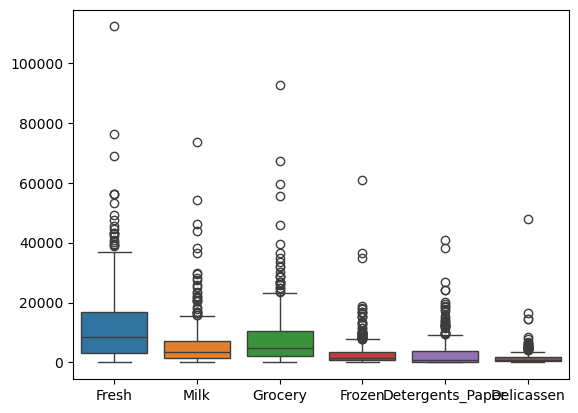

In [58]:
# Outlier detection
sns.boxplot(data=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

<Axes: >

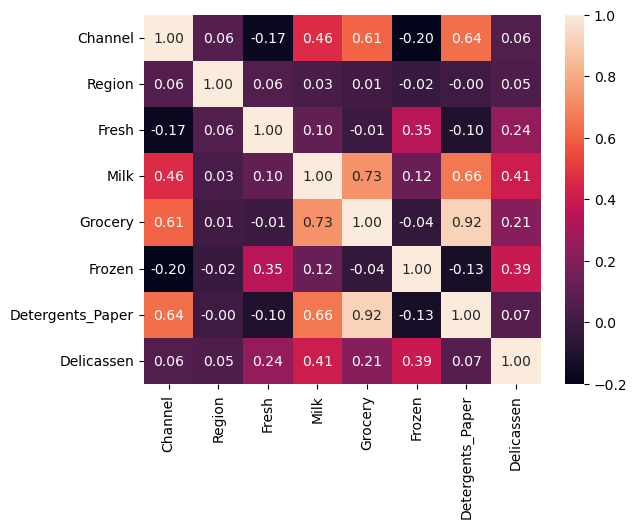

In [59]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [60]:
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Channel','Region'])) 

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

Text(0, 0.5, 'Inertia')

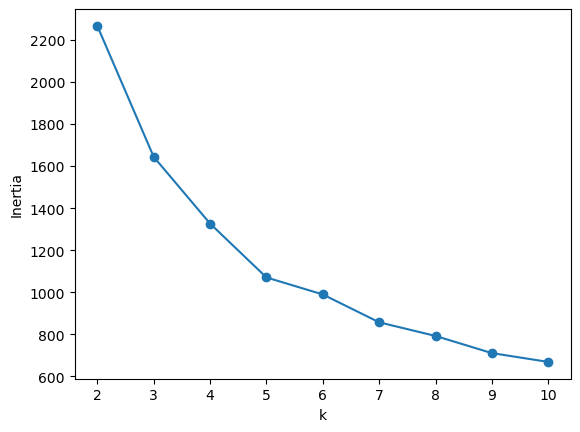

In [61]:
# Find the optimal k
inertias = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
plt.plot(K, inertias, '-o')
plt.xlabel('k'); plt.ylabel('Inertia')

In [62]:
# Fit KMeans
km = KMeans(n_clusters=5, random_state=42).fit(X)
df['kmeans_cluster'] = km.labels_

In [63]:
# Inspect cluster centers
centers = scaler.inverse_transform(km.cluster_centers_)
pd.DataFrame(centers, columns=spend_cols)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5509.250000,10555.635417,16477.927083,1420.125000,7199.406250,1658.791667
1,34188.627119,4850.576271,5870.000000,7215.559322,955.847458,2491.796610
2,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
3,9112.235294,2965.404412,3783.702206,2413.591912,976.908088,974.926471
4,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000


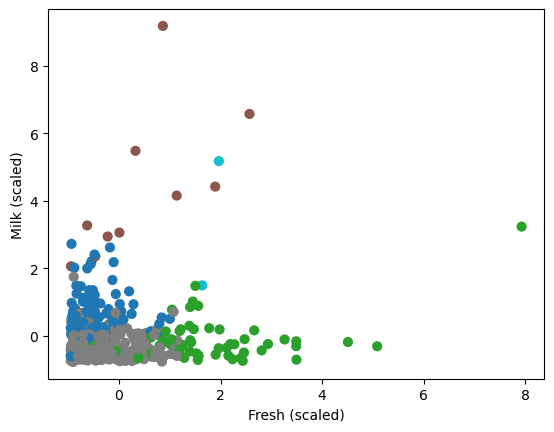

In [64]:
# Visualize
plt.scatter(X[:,0], X[:,1], c=df['kmeans_cluster'], cmap='tab10', s=40)
plt.xlabel('Fresh (scaled)'); plt.ylabel('Milk (scaled)')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [65]:
# Compute linkage
Z = linkage(X, method='ward')

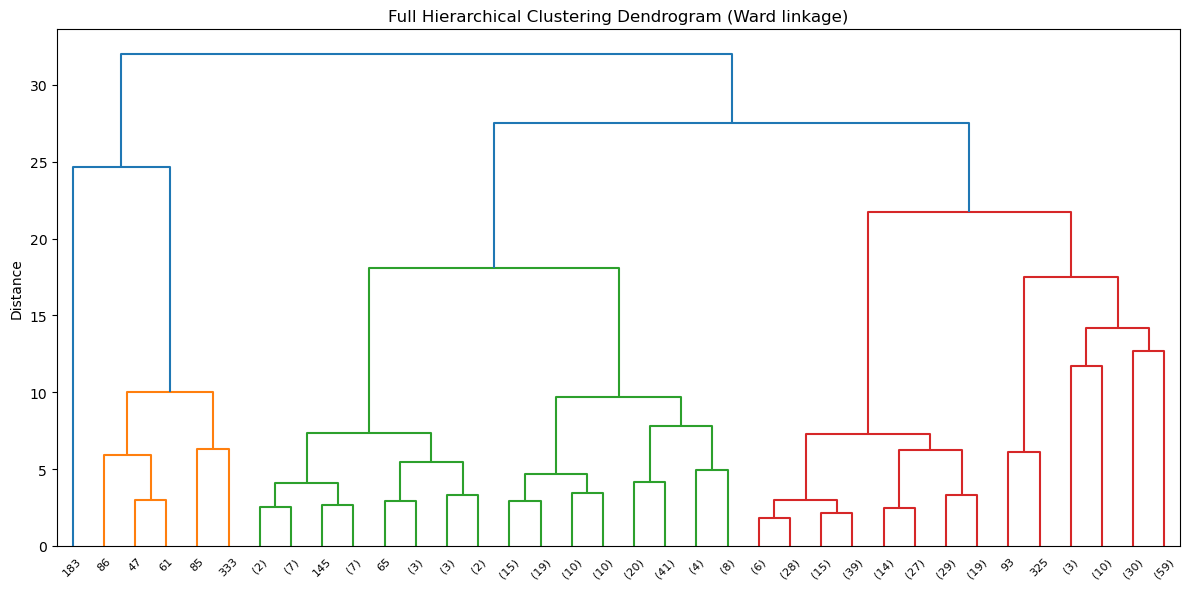

In [70]:
# Plot full dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='level',
    p = 5,
)
plt.ylabel('Distance')
plt.title('Full Hierarchical Clustering Dendrogram (Ward linkage)')
plt.tight_layout()
plt.show()

In [66]:
# Choose number of clusters
hc = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X)
df['hier_cluster'] = hc.labels_

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Text(0, 0.5, 'Cumulative explained variance')

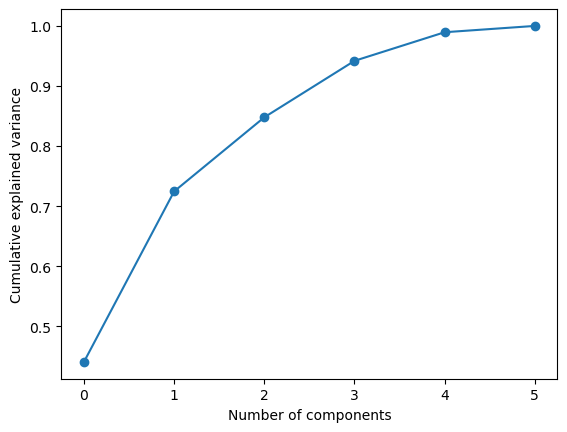

In [67]:
# Fit PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [68]:
# Pick n components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Variance explained by PC1 & PC2:", pca.explained_variance_ratio_)
df['PC1'], df['PC2'] = X_pca[:,0], X_pca[:,1]

Variance explained by PC1 & PC2: [0.44082893 0.283764  ]


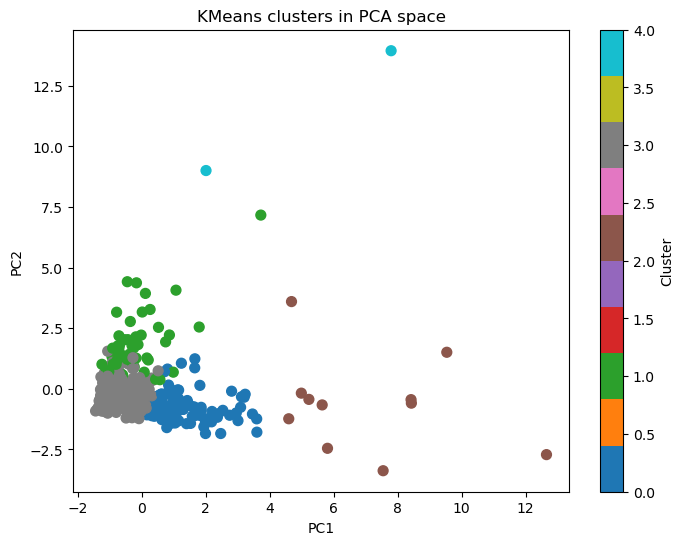

In [69]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['PC1'], df['PC2'], c=df['kmeans_cluster'], cmap='tab10', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans clusters in PCA space')
plt.colorbar(label='Cluster')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## Part V – Conclusion

- **Right‐skewed spending & outliers**  
  All six product categories (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen) exhibit strong right-tails and a handful of extreme buyers (medians much lower than means), indicating that log‐transformation or robust scaling improves clustering.

- **Five distinct K-Means segments (k = 5)**  
  1. **High Fresh & Grocery** buyers  
  2. **Heavy Milk & Detergents_Paper** purchasers  
  3. **Multi-category spenders** (above-average Frozen & Delicassen)  
  4. **Balanced, mid-range buyers** across all categories  
  5. **Low-volume clients** (below-average spend in every category)

- **Hierarchical clustering reveals three tiers**  
  Cutting the Ward dendrogram at three clusters yields:  
  - **Top‐tier spenders**  
  - **Mid‐range customers**  
  - **Low‐spending group**  
  This broadly aligns with the K-Means “high,” “medium,” and “low” segments.

- **PCA confirms separation**  
  The first two principal components explain ~72 % of variance (PC1 ≈ 44 %, PC2 ≈ 28 %). Plotting PC1 vs. PC2 shows clear separation of the five K-Means clusters, validating the segment definitions.